In [2]:
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import pickle

TensorFlow 1.x selected.


In [3]:
%pip install azure-storage-blob

In [4]:
import os, uuid
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient, __version__

try:
    print("Azure Blob storage v" + __version__ + " - Python quickstart sample")
    # Quick start code goes here
except Exception as ex:
    print('Exception:')
    print(ex)

Azure Blob storage v12.7.1 - Python quickstart sample


In [4]:
os.mkdir("./videos")

In [5]:
os.mkdir("./annots")

In [6]:
STORAGEACCOUNTNAME= "issia"
STORAGEACCOUNTKEY= "I8mH/fx5qd+6XxC3qF2K9V/pqZZMmEr+FA7p18pZz+QVXJEuRuWLvXQ07aWmd4LdSdAbVgu/qLy0ioS9etnwCg=="
CONTAINERNAME= "videos"

In [7]:
 connect_str  = 'DefaultEndpointsProtocol=https;AccountName=issia;AccountKey=I8mH/fx5qd+6XxC3qF2K9V/pqZZMmEr+FA7p18pZz+QVXJEuRuWLvXQ07aWmd4LdSdAbVgu/qLy0ioS9etnwCg==;EndpointSuffix=core.windows.net'
!pwd

/content


In [8]:
blob_service_client = BlobServiceClient.from_connection_string(connect_str)

In [9]:
for i in range(6):
    local_file_name = "Cam-" + str(i+1) + ".mp4"
    blob_client = blob_service_client.get_blob_client(container=CONTAINERNAME, blob=local_file_name)
    t = "./videos/Cam-" + str(i+1) + ".mp4"
    with open(t, "wb") as my_blob:
        blob_data = blob_client.download_blob()
        blob_data.readinto(my_blob)

In [10]:
STORAGEACCOUNTNAME= "issia"
STORAGEACCOUNTKEY= "I8mH/fx5qd+6XxC3qF2K9V/pqZZMmEr+FA7p18pZz+QVXJEuRuWLvXQ07aWmd4LdSdAbVgu/qLy0ioS9etnwCg=="
CONTAINERNAME= "annots"

In [11]:
 connect_str  = 'DefaultEndpointsProtocol=https;AccountName=issia;AccountKey=I8mH/fx5qd+6XxC3qF2K9V/pqZZMmEr+FA7p18pZz+QVXJEuRuWLvXQ07aWmd4LdSdAbVgu/qLy0ioS9etnwCg==;EndpointSuffix=core.windows.net'
!pwd

/content


In [12]:
blob_service_client = BlobServiceClient.from_connection_string(connect_str)

In [13]:
for i in range(6):
    local_file_name = "Cam-" + str(i+1) + ".csv"
    blob_client = blob_service_client.get_blob_client(container=CONTAINERNAME, blob=local_file_name)
    t = "./annots/Cam-" + str(i+1) + ".csv"
    with open(t, "wb") as my_blob:
        blob_data = blob_client.download_blob()
        blob_data.readinto(my_blob)

In [5]:
import matplotlib.pyplot as plt
import imageio
import imutils
import pandas as pd
import cv2
import random

In [6]:
cam = pd.DataFrame()
for i in range(4):
    d = pd.read_csv('./annots/Cam-' + str(i+1) + '.csv')
    d = d.drop(0)
    d = d.drop(1)
    d = d.drop(2)
    cam = pd.concat([cam,d])
for i in range(2):
    d = pd.read_csv('./annots/Cam-' + str(i+5) + '.csv')
    d = d.drop(0)
    d = d.drop(1)
    cam = pd.concat([cam,d])

In [7]:
cam = cam.reset_index()

In [8]:
cam

,index,Frame No.,x,y
0,3,4,-,-
1,4,5,-,-
2,5,6,-,-
3,6,7,-,-
4,7,8,-,-
...,...,...,...,...
17979,2995,2996,-,-
17980,2996,2997,-,-
17981,2997,2998,-,-
17982,2998,2999,-,-


In [9]:
cam = cam.rename(columns={"Frame No.":"f"," x":"x"," y":"y"})

In [10]:
for i in range(17984):
    if cam.x[i]==' -':
        cam.x[i] = -1
        cam.y[i] = -1
    cam.x[i] = int(cam.x[i])
    cam.y[i] = int(cam.y[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

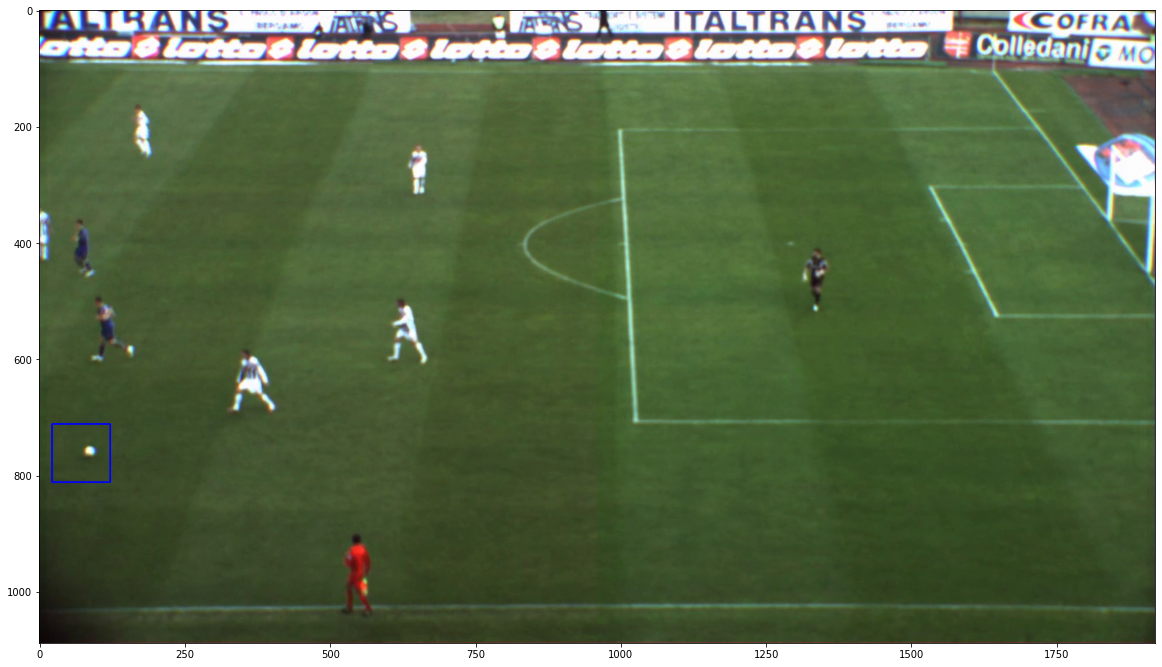

In [11]:
vid = imageio.get_reader('./videos/Cam-1.mp4')
i = 120
frame = vid.get_data(i)
clone = frame.copy()
x = cam.x[i]
y = cam.y[i]
cv2.rectangle(clone, (x-50,y-50), (x+50,y+50), (0,0,255), 2)
plt.figure(figsize=(20,20))
plt.imshow(clone)

In [12]:
i = 0
while cam.x[i] == -1:
    i += 1
i

116

In [13]:
def extract_frame(frame, x, y):
    if x>=50 and x<(frame.shape[1]-50):
        lx = 50
    elif x<50:
        lx = x
    else:
        lx = 100-(frame.shape[1]-x)
    if y>=50 and y<(frame.shape[0]-50):
        ly = 50
    elif y<50:
        ly = y
    else:
        ly = 100-(frame.shape[0]-y)
    return frame[y-ly:y+100-ly, x-lx:x+100-lx]

In [14]:
with open ('tx', 'rb') as fp:
    tx = pickle.load(fp)
with open ('ty', 'rb') as fp:
    ty = pickle.load(fp)

In [29]:
len(ty)

9180

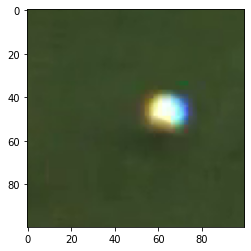

In [26]:
plt.imshow(tx[30])

In [30]:
n = 3
m = 6
for i in range(6000, 12000):
    if i%100 == 0:
        print(i)
    if cam.x[i] != -1:
        vid = imageio.get_reader('./videos/Cam-' + str(n) + '.mp4')
        frame = vid.get_data(m)
        for j in range(3):
            tx.append(extract_frame(frame, cam.x[i], cam.y[i]))
            ty.append(1)
            rx = random.randrange(0,1920)
            ry = random.randrange(0,1080)
            tx.append(extract_frame(frame, rx, ry))
            ty.append(0)
    m+=1
    if cam.f[i]>cam.f[i+1]:
        n += 1
        m = 0
if cam.x[i] != -1:
    vid = imageio.get_reader('./videos/Cam-' + str(n) + '.mp4')
    frame = vid.get_data(m)
print(i)

6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800


CannotReadFrameError: ignored

In [24]:
len(tx)

9180

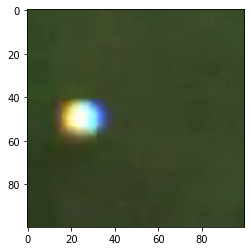

In [25]:
plt.imshow(tx[0])

In [26]:
import pickle

In [28]:
with open('tx', 'wb') as fp:
    pickle.dump(tx, fp)

In [29]:
with open('ty', 'wb') as fp:
    pickle.dump(ty, fp)

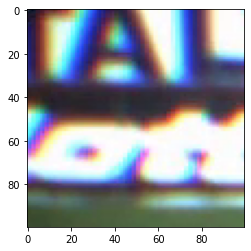

In [33]:
vid = imageio.get_reader('./videos/Cam-1.mp4')
frame = vid.get_data(115)
frame
plt.imshow(extract_frame(frame, cam.x[115], cam.y[115]))

In [222]:
trainx = np.asarray(tx)
trainy = np.asarray(ty)

In [224]:
trainx.shape

(7300, 100, 100, 3)

In [225]:
trainy.shape

(7300,)

In [227]:
trainy = np.expand_dims(trainy, axis=1)

In [228]:
trainy.shape

(7300, 1)

In [267]:
from sklearn.model_selection import train_test_split

In [243]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense

In [253]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(100,100,3))

In [254]:
model = Sequential()

In [276]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [258]:
trainx_1 = vgg.predict(trainx)

In [259]:
trainx_1.shape

(7300, 3, 3, 512)

In [272]:
(x_train, x_val, y_train, y_val) = train_test_split(trainx_1, trainy, test_size=0.2, shuffle=True)

In [273]:
x_val.shape

(1460, 3, 3, 512)

In [277]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [278]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val,y_val))

Train on 5840 samples, validate on 1460 samples
Epoch 1/10
5840/5840 [==============================] - 10s 2ms/sample - loss: 0.2126 - acc: 0.9620 - val_loss: 0.0774 - val_acc: 0.9877
Epoch 2/10
5840/5840 [==============================] - 10s 2ms/sample - loss: 0.0775 - acc: 0.9830 - val_loss: 0.0231 - val_acc: 0.9932
Epoch 3/10
5840/5840 [==============================] - 10s 2ms/sample - loss: 0.3066 - acc: 0.8598 - val_loss: 0.5019 - val_acc: 0.7274
Epoch 4/10
5840/5840 [==============================] - 10s 2ms/sample - loss: 0.4369 - acc: 0.7813 - val_loss: 0.6363 - val_acc: 0.5829
Epoch 5/10
5840/5840 [==============================] - 10s 2ms/sample - loss: 0.6529 - acc: 0.5558 - val_loss: 0.6529 - val_acc: 0.5021
Epoch 6/10
5840/5840 [==============================] - 10s 2ms/sample - loss: 0.5544 - acc: 0.6815 - val_loss: 0.4208 - val_acc: 0.8144
Epoch 7/10
5840/5840 [==============================] - 10s 2ms/sample - loss: 0.2296 - acc: 0.9348 - val_loss: 0.1217 - val_acc: 

In [279]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  4719616   
_________________________________________________________________
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  1049600   
_________________________________________________________________
dense_2 (Dense)              multiple                  131200    
_________________________________________________________________
dense_3 (Dense)              multiple                  2064      
_________________________________________________________________
dense_4 (Dense)              multiple                 

In [280]:
def sliding_window(img, win, step):
    for y in range(0,img.shape[0]-win[1],step):
        for x in range(0,img.shape[1]-win[0],step):
            yield (x,y,img[y:y+win[1],x:x+win[0]])

In [281]:
def pyramid(img, scale, minsize):
    yield img
    print(img.shape)
    while True:
        w = int(img.shape[1]/scale)
        img = imutils.resize(img, width=w)
        if img.shape[0]<minsize[1] or img.shape[1]<minsize[0]:
            break
        yield img
        print(img.shape)

In [352]:
win_size = (100,100)
step = 50

In [326]:
test = plt.imread('sample.png')

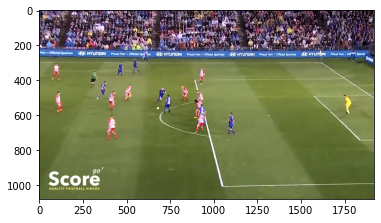

In [327]:
plt.imshow(test)

In [328]:
frame_1 = frame.astype(np.float)/255
for y in range(test.shape[0]):
    for x in range(test.shape[1]):
        if (test[y][x][1]<(np.max([test[y][x][0],test[y][x][2]]))):
            frame_1[y][x] *= 0

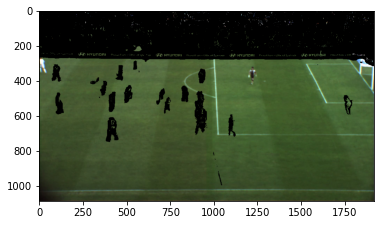

In [329]:
plt.imshow(frame_1)

In [330]:
v = 0
for i in range(frame_1.shape[0]):
    if (np.sum(frame_1[i,:,1])/frame_1.shape[1])>0.2:
        v = i
        break

In [331]:
test = test[v:]

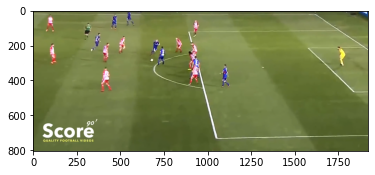

In [346]:
plt.imshow(test)

In [347]:
rois = []
locs = []
preds = []
for x,y,roi in sliding_window(test, win_size, step):
    rois.append(roi)
    locs.append((x,y))
    t = vgg.predict(np.expand_dims(roi, 0))
    preds.append(model.predict(t))
    if x==0 and y%10==0:
        print(x,y)

0 0
0 10
0 20
0 30
0 40
0 50
0 60
0 70
0 80
0 90
0 100
0 110
0 120
0 130
0 140
0 150
0 160
0 170
0 180
0 190
0 200
0 210
0 220
0 230
0 240
0 250
0 260
0 270
0 280
0 290
0 300
0 310
0 320
0 330
0 340
0 350
0 360
0 370
0 380
0 390
0 400
0 410
0 420
0 430
0 440
0 450
0 460
0 470
0 480
0 490
0 500
0 510
0 520
0 530
0 540
0 550
0 560
0 570
0 580
0 590
0 600
0 610
0 620
0 630
0 640
0 650
0 660
0 670
0 680
0 690
0 700


In [348]:
np.max(preds)

0.052625123

In [337]:
len(locs)

555

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


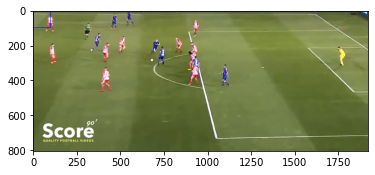

In [338]:
clone = test.copy()
i = np.argmax(preds)
cv2.rectangle(clone, (locs[i][0],locs[i][1]), (locs[i][0]+100,locs[i][1]+100), (0,0,255), 2)
plt.imshow(clone)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


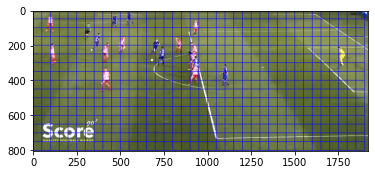

In [341]:
clone = test.copy()
for i in range(len(preds)):
        cv2.rectangle(clone, (locs[i][0],locs[i][1]), (locs[i][0]+100,locs[i][1]+100), (0,0,255), 2)
plt.imshow(clone)

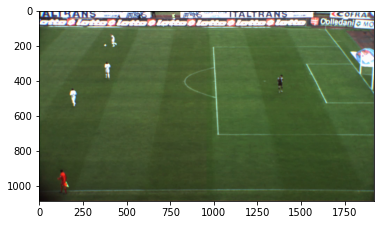

In [350]:
test = vid.get_data(300)
plt.imshow(test)

In [353]:
rois = []
locs = []
preds = []
for x,y,roi in sliding_window(test, win_size, step):
    rois.append(roi)
    locs.append((x,y))
    t = vgg.predict(np.expand_dims(roi, 0))
    preds.append(model.predict(t))
    if x==0 and y%10==0:
        print(x,y)

0 0
0 50
0 100
0 150
0 200
0 250
0 300
0 350
0 400
0 450
0 500
0 550
0 600
0 650
0 700
0 750
0 800
0 850
0 900
0 950


In [355]:
np.argmax(preds)

81

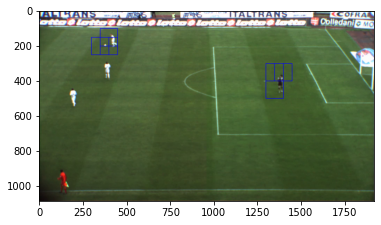

In [357]:
clone = test.copy()
for i in range(len(preds)):
    if preds[i]>0.99:
        cv2.rectangle(clone, (locs[i][0],locs[i][1]), (locs[i][0]+100,locs[i][1]+100), (0,0,255), 2)
plt.imshow(clone)

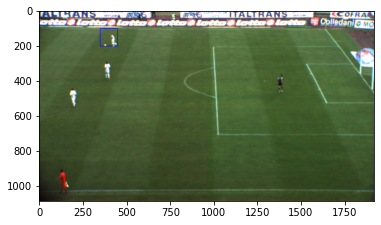

In [358]:
clone = test.copy()
i = np.argmax(preds)
cv2.rectangle(clone, (locs[i][0],locs[i][1]), (locs[i][0]+100,locs[i][1]+100), (0,0,255), 2)
plt.imshow(clone)